In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import operator
import plotly
from datetime import datetime

data1=pd.read_csv("./userRank.csv")
data2=pd.read_csv("./competitionSet.csv")
data3=pd.read_csv("./userGameGrade.csv")
data4=pd.read_csv("./categoryCode.csv")
data5=pd.read_csv("./rankTable.csv")
data6=pd.read_csv("./User.csv")
data7=pd.read_csv("./Relationship.csv")
data8=pd.read_csv("./financeInfo.csv")    

nowmonth=datetime.now().month
month=[1,2,3,4,5,6,7,8,9,10,11,12]


In [2]:
categories=["1st","etc"]





class dataAnaInGame:
    
    def __init__(self,thisplayer):
        self.thisplayer=thisplayer
        self.upper=0
        self.lower=0
        
    #전체 스코어중 1등
    def winnerCountForGraph(self,thisplayer):
        record=(data1[data1['_ID']==self.thisplayer])
        self.upper=int(record['WINRECORD'])
        self.lower=int(record['GAMECOUNT'])-int(record['WINRECORD'])
        return self.upper,self.lower
        
    def drawPieGraph(self,dat1,dat2):
        forpiegraph=[dat1,dat2]
        
        plt.pie(forpiegraph,labels=categories,colors=["#AE73D2","#FF6699"])
        plt.legend(categories)
        
        plt.show()
        
    #게임 내 1등
    def getFirstCount(self,thisplayer):
        takefirstrecord=(data3[data3['_ID']==self.thisplayer])
        this=(takefirstrecord[takefirstrecord["GAMEGRADE"]==1])
        fstcount=int(this["GAMEGRADE"])
        return fstcount
    
    def getMostCategory(self,thisplayer):
        takedata1=data3[data3["_ID"]==self.thisplayer]
        takedatalist=[]
        for i in takedata1["ROOMNUM_ID"]:
            takedatalist.append(i)
        codearr=[]
        for i in takedatalist:
            if i==data2["ROOMNUM_ID"][i-1]:
                codearr.append(data2["CATEGORYCODE"][i-1])
        
        codecnt=dict()

        for w in codearr:
            if w not in codecnt.keys():
                codecnt[w]=1
        else:
            codecnt[w]+=1
        scodecnt=sorted(codecnt.items(),key=operator.itemgetter(1))

        #가장많이 플레이한 코드

        fst=scodecnt[len(scodecnt)-1]
        del scodecnt[len(scodecnt)-1]

        snd=scodecnt[len(scodecnt)-1]
        del scodecnt[len(scodecnt)-1]

        trd=scodecnt[len(scodecnt)-1]
        del scodecnt[len(scodecnt)-1]
        
        showlist=[fst,snd,trd]
        showlist[0][1]
        
        #가장 많이한 카테고리

        for i in range(3):
            val=showlist[i][0]
            print('가장많이 참여한 내기',i+1,'순위:',data4.iloc[val].loc['CATEGORY'])
        
    def drawGradeGraph(self,thisplayer):
        thisplayergrade=data1.loc[self.thisplayer-1,'GRADE']
        thisplayerpoint=data1.loc[self.thisplayer-1,'POINTS']
        
        targetpoint=data5[data5['RANK']==thisplayergrade]['MAX']
        gap=data5[data5['RANK']==thisPlayerGrade]['MAX']-data5[data5['RANK']==thisPlayerGrade]['MIN']
        #print(int(targetPoint-thisPlayerPoint))
        #print(int(gap)
        
      #전체순위 추출:해당 플레이어 순위 추출  
    
    def getAllRank(self,thisplayer):
        orddf=data1.sort_values(by='POINTS',ascending=False)
        #재정렬
        orddf=orddf.reset_index(drop=True)
        allrank=orddf[orddf['_ID']==self.thisplayer].index[0]+1
        return allrank
        
    #경쟁전 수,,.>상위 비율 추출하기
    
    
    
        

1. 특정user_id의 승을 알아내서 전체 1등, 전적 pie graph 뽑아내기
2. 1등 비율 뽑아내기(winner)
3. 가장 많이 플레이한 코드(카테고리)를 추출한다
4. 도넛 그래프 등급
5. 전체 중 해당 플레이어 순위 추출




In [3]:
player=dataAnaInGame(int(input()))

4


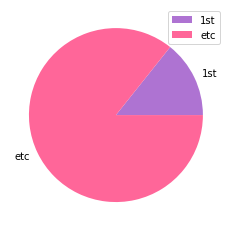

TypeError: cannot convert the series to <class 'int'>

In [4]:
upper,lower=player.winnerCountForGraph(player.thisplayer)
dataAnaInGame.drawPieGraph(player,player.upper,player.lower)
dataAnaInGame.getFirstCount(player,player.thisplayer)
dataAnaInGame.getMostCategory(player,player.thisplayer)
dataAnaInGame.getAllRank(player,player.thisplayer)

In [ ]:
class DataAnaInSystem:
    def __init__(self,thisplayer):
        self.thisplayer=thisplayer
        #친구 리스트 뽑아오기
    def findFriendRelationship(self,player):
        friendList=[]
        for i in data7[(data7['USERONE']==self.thisplayer)]['USERTWO']:
            friendList.append(i)
        for i in data7[(data7['USERTWO']==self.thisplayer)]['USERONE']:
            friendList.append(i)
        cmplist=[]
        for i in data6['_ID']:
            cmplist.append(i)
        friendVal=list(set(cmplist).intersection(set(friendList)))
        
        for i in range(len(friendVal)):
            print(data6[data6['_ID']==friendVal[i]]["NICKNAME"])


    
    

In [ ]:
friendList=[]
for i in data7[(data7['USERONE']==1)]['USERTWO']:
    friendList.append(i)
for i in data7[(data7['USERTWO']==1)]['USERONE']:
    friendList.append(i)
    
#찾고 찾고,,,

#for j in friendList:
 #   data6['_ID']

friendList


      
    #(data7['USERTWO']==1)]

In [ ]:
cmplist=[]
for i in data6['_ID']:
    cmplist.append(i)
    

In [ ]:
friendVal=list(set(cmplist).intersection(set(friendList)))

In [ ]:
for i in range(len(friendVal)):
    #친구리스트 불러오는 기능
    print(data6[data6['_ID']==friendVal[i]]["NICKNAME"])


In [ ]:
data8.head()

In [ ]:
data6.head()

In [ ]:
#thisplayer=2
#servertime=2020.
#data8[data6['_ID']==2]['PAYMENTTIME']
#ID값을 받아서 그 ID값에 따라


#가상 테이블을 하나 만들어야할듯,,!
#_ID,PAYMENTTIME,PAYMENTPRICE 추출

# dividePay=data8[['_ID','PAYMENTPRICE']]
#month, time 나눠야함

#특정 플레이어 paytime끌어온 뒤 추가를 해야할듯,,,!



# isthisplayer=data8['_ID']==2

# splitResult=[]
# payMonth=[]
# payDay=[]
# takeID=[]
# price=[]

# takeID=data8[isthisplayer]['_ID']



# j=0
# for i in data8[isthisplayer]['PAYMENTTIME']:
#     splitResult.append(i.split('.'))
#     payMonth.append(int(splitResult[j][1]))
#     payDay.append(int(splitResult[j][2]))
#     j+=1

# for i in data8[isthisplayer]['PAYMENTPRICE']:
#     price.append(int(i))
#dividePay['PAYMONTH']=pd.Series(payMonth)


In [ ]:
# month=[1,2,3,4,5,6,7,8,9,10,11,12]

# one=month[nowmonth-2]
# two=month[nowmonth-3]
# three=month[nowmonth-4]
# four=month[nowmonth-5]
# five=month[nowmonth-6]
# six=month[nowmonth-7]


# dividePay=pd.DataFrame({'ID':takeID,'MONTH':payMonth,'DAY':payDay,'PRICE':price})

# isMonthlyPay=dividePay['MONTH']==one

# for i in dividePay[isMonthlyPay]['PRICE']:


# dividePay['MONTH']



    
# elif dividePay['MONTH'] == two:
# elif dividePay['MONTH'] == three:
# elif dividePay['MONTH'] == four:
# elif dividePay['MONTH'] == five:
# elif dividePay['MONTH'] == six:
    



# for i in dividePay['MONTH']:
#     i=int(i)

#     if i==one:
#         #서버기준 한 달전
#         isMonthPrice=dividePay['MONTH']==i
#         dividePay[isMonthPrice]
        
# #     elif i==two:
# #         #서버기준 두 달전
# #         print('bye')
# #     elif i==three:
# #         #서버기준 세 달전
# #         print('hell')
# #     elif i==four:
# #         #서버기준 네 달전
# #         print('hhh')    
# #     elif i==five:
# #         #서버기준 다섯 달전
# #         print('hi')
# #     elif i==six:
# #         #서버기준 여섯 달전
# #         print('hi')


In [ ]:


# print(type(one))

# print(two)
# for i in range(len(pt)):
#     if int(pt[i][1]) == one:
#         print(pt[i])
#     elif int(pt[i][1]) == two:
#         print(pt[i])
#     elif int(pt[i][1]) == three:
#         print(pt[i])
#     elif int(pt[i][1]) == four:
#         print(pt[i])
#     elif int(pt[i][1]) == five:
#         print(pt[i])
#     elif int(pt[i][1]) == six:
#         print(pt[i])    

In [ ]:
#nowmonth-1을 해줘야함


#남은금액



#thisPlayer=int(input())
thisPlayer=2

isThisPlayer=data8['_ID']==thisPlayer

#시간 싱크 처리전
data8[isThisPlayer]['PAYMENTPRICE']









In [ ]:
#남은 금액

#FI--->thisPlayer






#ID받아와서 ParticipatedList이용해 참여한 방 roomnum 따온다,CATECODE도 같이 따오고...
#RoomNum 받아와서 ID와 함께 해당방에서 저장한 남은 금액 갱신
#시간싱크


# data1=pd.read_csv("./userRank.csv")
# data2=pd.read_csv("./competitionSet.csv")
# data3=pd.read_csv("./userGameGrade.csv")
# data4=pd.read_csv("./categoryCode.csv")
# data5=pd.read_csv("./rankTable.csv")
# data6=pd.read_csv("./User.csv")
# data7=pd.read_csv("./Relationship.csv")
# data8=pd.read_csv("./financeInfo.csv")  


전체흐름
1)FI에서 thisplayer받아와서 값을 받아둔다
2)ID를 통해서 participatedList를 이용해 참여한 방 roomnum을 받아온다(카테고리CODE도)
3)roomnum받아서 ID와 함께 해당방에서 저장한 남은금액을 갱신한다
4)시간 싱크를 맞춘다

In [6]:
arr=[950,1300,1350,1910,1920]

In [12]:
data1.loc[POINTS==arr[0]]

NameError: name 'POINTS' is not defined

In [4]:
data8[data8['PAYMENTPRICE']>2]

,FINANCEINFO_ID,_ID,CATEGORYCODE,PAYMENTTIME,PAYMENTPRICE,INANDOUT
0,1,1,1,2020-01-02 12:45:29.123,3000,1
1,2,2,2,2020-01-03 12:45:29.124,3200,1
2,3,3,3,2020-01-03 12:45:29.125,4500,1
3,4,4,4,2020-01-03 12:45:29.126,3500,1
4,5,5,5,2020-01-03 12:45:29.127,4500,1
5,6,6,6,2020-01-03 12:45:29.128,10000,1
6,7,7,7,2020-01-04 21:45:29.129,32100,1
7,8,8,8,2020-01-04 21:45:29.130,54200,1
8,9,9,9,2020-01-04 21:45:29.131,3200,1
9,10,10,10,2020-01-04 21:45:29.132,1000,1
